# Final Project - Meachine Learning

## By Noa Gelber and Liri Bar-On

*Given information about users of an online shopping site (E-Commerce), we were asked to build a model that predicts what is the chance of a particular user, to purchase while browsing the site.*

Based on 10,479 observations that were indicated whether a purchase was made or not.
We will research and process the data, train models, and pick the best one to predict the test data.

# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from typing import List, Dict
%matplotlib inline
from sklearn.linear_model import Ridge
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import auc, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from seaborn import load_dataset
from sklearn.model_selection import  GridSearchCV
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.patches as patches
from scipy import interp
import warnings
from dython.nominal import associations
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [2]:
pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in c:\anaconda3\lib\site-packages (1.2.0)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --user dython

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install mlxtend

## First, we would like to load the two data sets - train & test

In [5]:
# load
data_train=pd.read_csv("C:/Users/noagl/OneDrive - mail.tau.ac.il/Desktop/ml_project/train.csv")
data_test=pd.read_csv("C:/Users/noagl/OneDrive - mail.tau.ac.il/Desktop/ml_project/test.csv")
pd.set_option('display.max_columns', None) 

# 1 - Let's explore the data sets!

In [6]:
data_train

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,Month,device,internet_browser,Region,user_type,Weekend,A,B,C,D,purchase
0,0,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,0.000000,0.0,Feb,1.0,safari_15,1.0,Returning_Visitor,False,c_1,118.880094,log202,NaN,0
1,1,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4.0,safari_14,9.0,Returning_Visitor,False,c_3,113.358423,log404,NaN,0
2,2,0.0,0.0,0.0,NaN,NaN,627.5 minutes,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3.0,browser_3_v17,1.0,Returning_Visitor,True,c_4,121.507695,log202,NaN,0
3,3,0.0,0.0,0.0,0.0 minutes,19.0,154.2166667 minutes,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2.0,chrome_99.1.3,1.0,Returning_Visitor,False,c_3,93.747176,log_100,NaN,0
4,4,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,0.000000,0.4,Feb,2.0,edge_96.0.1054.75,3.0,Returning_Visitor,False,c_3,99.545824,log202,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10474,10474,3.0,145.0,0.0,0.0 minutes,53.0,1783.791667 minutes,1928.791667,0.007143,0.029031,12.241717,0.0,Dec,4.0,browser_6_v12,1.0,Returning_Visitor,True,c_1,79.548460,log400,NaN,0
10475,10475,0.0,0.0,0.0,0.0 minutes,5.0,465.75 minutes,NaN,0.000000,0.021333,0.000000,0.0,Nov,3.0,chrome_98.0.1,1.0,Returning_Visitor,True,c_8,99.457255,log202,NaN,0
10476,10476,0.0,0.0,0.0,0.0 minutes,6.0,184.25 minutes,NaN,0.083333,0.086667,0.000000,0.0,Nov,3.0,chrome_99.1.3,1.0,Returning_Visitor,True,c_13,94.417344,log8080,NaN,0
10477,10477,4.0,75.0,0.0,0.0 minutes,15.0,346.0 minutes,NaN,0.000000,0.021053,0.000000,0.0,Nov,2.0,chrome_80,3.0,Returning_Visitor,False,c_11,108.919057,log400,NaN,0


In [7]:
data_train.shape

(10479, 23)

## As we can see, the two data sets have the same columns, except of one - Purchase. The test data is lack of this column, since it's our job to provide it at the end of the entire process.

## We can also identify that there are pure numeric and catrgorial features. 

In [8]:
all_cols = data_train.columns
numeric = data_train.select_dtypes(include=[np.number]).columns
cat_cols = list(set(all_cols) - set(numeric))
print('categorial features:',cat_cols)
print('numeric features:',numeric)

categorial features: ['product_page_duration', 'user_type', 'A', 'C', 'Month', 'internet_browser', 'info_page_duration', 'Weekend']
numeric features: Index(['id', 'num_of_admin_pages', 'admin_page_duration', 'num_of_info_pages',
       'num_of_product_pages', 'total_duration', 'BounceRates', 'ExitRates',
       'PageValues', 'closeness_to_holiday', 'device', 'Region', 'B', 'D',
       'purchase'],
      dtype='object')


## Despite these results, gowing forward with the project, we will precise the divition. 

## Let's view some statistics, using the describe() function

In [9]:
data_train.describe()

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,num_of_product_pages,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,device,Region,B,D,purchase
count,10479.00000,9874.000000,10066.000000,9792.000000,10076.000000,5726.000000,10457.000000,10453.000000,10452.000000,9983.000000,10156.000000,10460.000000,10456.000000,105.000000,10479.000000
mean,5239.00000,2.321957,80.462468,0.502655,31.870187,1302.457216,0.021854,0.042859,5.900387,0.061985,2.122981,3.155641,99.769628,4.060440,0.154690
std,3025.17107,3.335331,179.217548,1.265812,44.816259,2039.312905,0.048100,0.048297,18.727496,0.199429,0.906859,2.404672,10.050268,2.189818,0.361626
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,60.733919,-1.235571,0.000000
25%,2619.50000,0.000000,0.000000,0.000000,7.000000,221.000000,0.000000,0.014283,0.000000,0.000000,2.000000,1.000000,93.030568,3.141657,0.000000
50%,5239.00000,1.000000,8.000000,0.000000,18.000000,677.851191,0.002968,0.025161,0.000000,0.000000,2.000000,3.000000,99.787249,4.432221,0.000000
75%,7858.50000,4.000000,93.000000,0.000000,38.000000,1605.733333,0.016667,0.050000,0.000000,0.000000,3.000000,4.000000,106.506626,5.531061,0.000000
max,10478.00000,27.000000,3398.750000,24.000000,705.000000,47850.920680,0.200000,0.200000,361.763742,1.000000,8.000000,9.000000,141.735142,7.618254,1.000000


## We could also identify that there are some missing cells in each column. Here is the full description:

In [10]:
Na = data_train.isnull().sum()
Na[Na>0]

num_of_admin_pages         605
admin_page_duration        413
num_of_info_pages          687
info_page_duration         317
num_of_product_pages       403
product_page_duration      621
total_duration            4753
BounceRates                 22
ExitRates                   26
PageValues                  27
closeness_to_holiday       496
Month                       25
device                     323
internet_browser           563
Region                      19
user_type                   23
Weekend                     23
A                          706
B                           23
C                           23
D                        10374
dtype: int64

In [11]:
Na = data_test.isnull().sum()
Na[Na>0]

num_of_admin_pages         93
admin_page_duration        78
num_of_info_pages         126
info_page_duration         64
num_of_product_pages       77
product_page_duration     113
total_duration            844
BounceRates                 4
ExitRates                   2
PageValues                  2
closeness_to_holiday       87
Month                       3
device                     64
internet_browser          107
Region                      2
user_type                   2
Weekend                     2
A                         121
B                           2
C                           1
D                        1832
dtype: int64

## Now we woul like to see if there are any correlated features

outliear: ALL optinal boxplot

<AxesSubplot:>

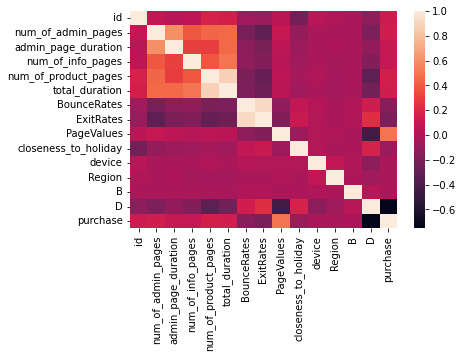

In [12]:
corr = data_train.corr()
sns.heatmap(corr)

## It seems that there are few high correlations betweeen some features. for example: "num_of_admin_pages" and "admin_page_duration" are pretty correlated

In [13]:
data_train_copy = data_train.copy()
data_test_copy =data_test.copy()

## Now, we would like to visualize each feature's distribution

Text(0, 0.5, 'number of consumer')

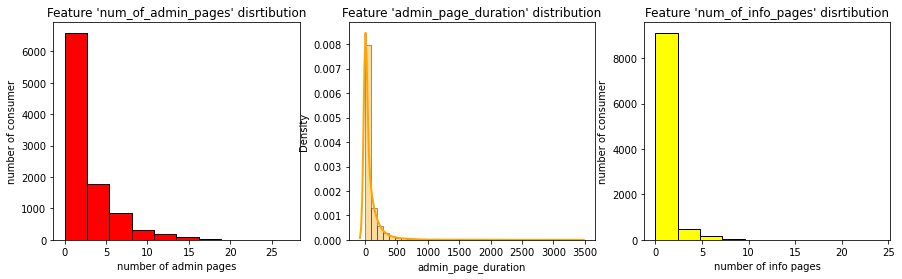

In [14]:
warnings.filterwarnings('ignore')
data_train_copy = data_train.copy()

num_of_admin_pages_without_na=data_train_copy["num_of_admin_pages"].dropna() #num_of_admin_pages
admin_page_duration_without_na=data_train_copy["admin_page_duration"].dropna() #admin_page_duration
num_of_info_pages_without_na=data_train_copy["num_of_info_pages"].dropna() #num_of_info_pages

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.hist(num_of_admin_pages_without_na,color="red",edgecolor="black")
plt.title("Feature 'num_of_admin_pages' disrtibution")
plt.xlabel("number of admin pages")
plt.ylabel("number of consumer")

plt.subplot(1,3, 2)
sns.distplot(admin_page_duration_without_na, hist=True, kde=True, 
             bins=int(180/5), color = 'orange', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.title("Feature 'admin_page_duration' distribution")

plt.subplot(1 ,3, 3)
plt.hist(num_of_info_pages_without_na,color="yellow",edgecolor="black")
plt.title("Feature 'num_of_info_pages' disrtibution")
plt.xlabel("number of info pages")
plt.ylabel("number of consumer")


Text(0.5, 1.0, "Feature 'product_page_duration' distribution")

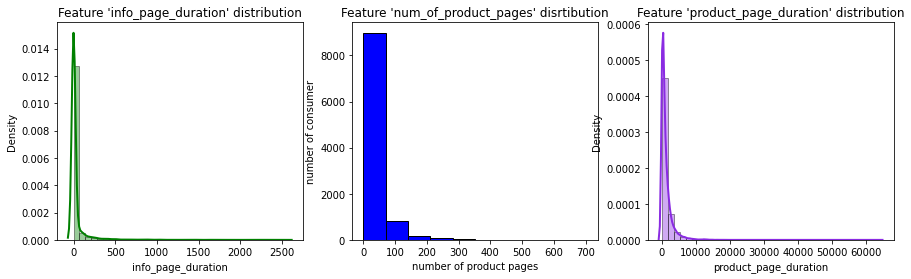

In [15]:
warnings.filterwarnings('ignore')
info_page_duration_without_na=data_train_copy["info_page_duration"].dropna() #info_page_duration
len_info_duration_column = len(info_page_duration_without_na)
for i in range(0,len_info_duration_column):
    info_page_duration_without_na.iloc[i] = info_page_duration_without_na.iloc[i].replace(' minutes','')
    float(info_page_duration_without_na.iloc[i])
num_of_product_pages_without_na=data_train_copy["num_of_product_pages"].dropna() #num_of_product_pages
product_page_duration_without_na=data_train_copy["product_page_duration"].dropna() #product_page_duration
len_product_duration_column = len(product_page_duration_without_na)
for i in range(0,len_product_duration_column):
    product_page_duration_without_na.iloc[i] = product_page_duration_without_na.iloc[i].replace(' minutes','')
    float(product_page_duration_without_na.iloc[i])

plt.figure(figsize=(15, 4))
plt.subplot(1 ,3, 1)
sns.distplot(info_page_duration_without_na, hist=True, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.title("Feature 'info_page_duration' distribution")

plt.subplot(1 ,3, 2)
plt.hist(num_of_product_pages_without_na,color="blue",edgecolor="black")
plt.title("Feature 'num_of_product_pages' disrtibution")
plt.xlabel("number of product pages")
plt.ylabel("number of consumer")

plt.subplot(1 ,3, 3)
sns.distplot(product_page_duration_without_na, hist=True, kde=True, 
             bins=int(180/5), color = 'blueviolet', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.title("Feature 'product_page_duration' distribution")



Text(0.5, 1.0, "Feature 'ExitRates' distribution")

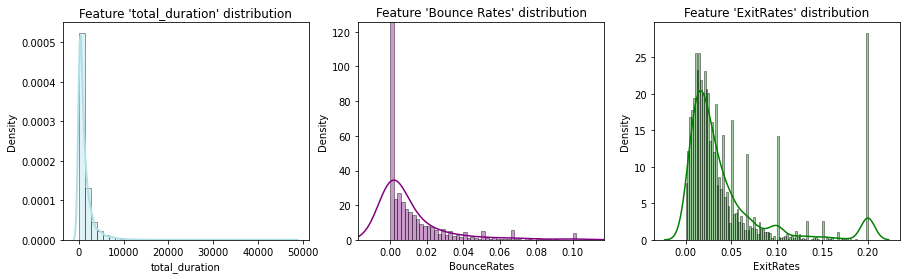

In [16]:
warnings.filterwarnings('ignore')
total_duration_without_na=data_train_copy["total_duration"].dropna() #total_duration
BounceRates_without_na=data_train_copy['BounceRates'].dropna() #BounceRates
ExitRates_without_na=data_train_copy['ExitRates'].dropna() #ExitRates

plt.figure(figsize=(15, 4))
plt.subplot(1 ,3, 1)
sns.distplot(total_duration_without_na, hist=True, kde=True, 
             bins=int(180/5), color = 'powderblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.title("Feature 'total_duration' distribution")

plt.subplot(1 ,3, 2)
sns.distplot(BounceRates_without_na,hist=True, bins=100, color='purple',
            hist_kws={"edgecolor": 'black'})
scale_factor =0.5
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.ylim(ymin * scale_factor, ymax * scale_factor)
plt.title("Feature 'Bounce Rates' distribution")

plt.subplot(1 ,3, 3)
sns.distplot(ExitRates_without_na,hist=True, bins=100, color='green',
            hist_kws={"edgecolor": 'black'})
scale_factor =1
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.ylim(ymin * scale_factor, ymax * scale_factor)
plt.title("Feature 'ExitRates' distribution")

Text(0, 0.5, 'number of consumer sessions per month')

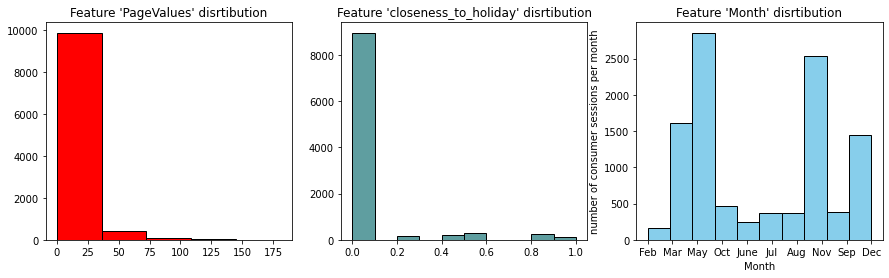

In [17]:
warnings.filterwarnings('ignore')
PageValues_without_na=data_train_copy['PageValues'].dropna() #PageValues
closeness_to_holiday_without_na=data_train_copy["closeness_to_holiday"].dropna() #closeness_to_holiday
Month_without_na=data_train_copy["Month"].dropna() #month

plt.figure(figsize=(15, 4))
plt.subplot(1 ,3, 1)
plt.hist(PageValues_without_na,color="red",edgecolor="black")
scale_factor =0.5
xmin, xmax = plt.xlim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.title("Feature 'PageValues' disrtibution")

plt.subplot(1 ,3, 2)
plt.hist(closeness_to_holiday_without_na,color="cadetblue",edgecolor="black")
plt.title("Feature 'closeness_to_holiday' disrtibution")

plt.subplot(1 ,3, 3)
plt.hist(Month_without_na,color="skyblue",edgecolor="black")
plt.title("Feature 'Month' disrtibution")
plt.xlabel("Month")
plt.ylabel("number of consumer sessions per month")

Text(0, 0.5, "'user_type' feature")

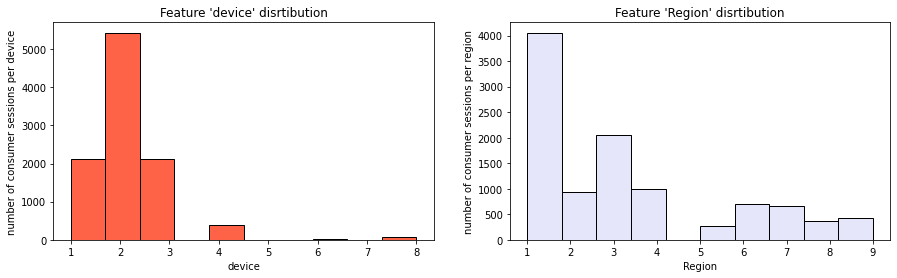

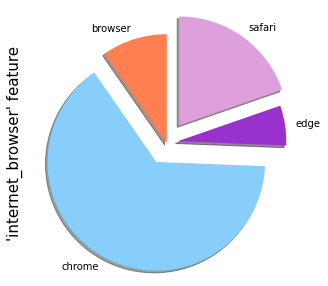

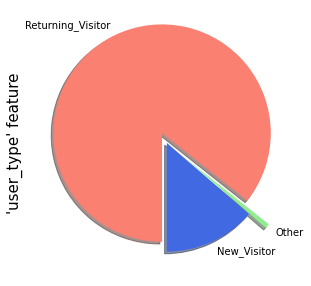

In [18]:
warnings.filterwarnings('ignore')
device_without_na=data_train_copy["device"].dropna() #device
Region_without_na=data_train_copy["Region"].dropna() #Region
for i in data_train_copy['internet_browser']: #internet_browser
    if isinstance(i,str):
        if i.startswith('chrome'):
            data_train_copy['internet_browser'] = data_train_copy['internet_browser'].replace([i],'chrome')
            pass
        if i.startswith('edge'):
            data_train_copy['internet_browser'] = data_train_copy['internet_browser'].replace([i],'edge')
            pass
        if i.startswith('safari'):
            data_train_copy['internet_browser'] = data_train_copy['internet_browser'].replace([i],'safari')
            pass
        if i.startswith('browser'):
            data_train_copy['internet_browser'] = data_train_copy['internet_browser'].replace([i],'browser')
            pass

#We've descided that the particular version of the browser is not very much important. Therefore, we've reduced the number of the browser categories into 4 main categories: chrome,edge,sefari,browser.
        
        
plt.figure(figsize=(15, 4))
plt.subplot(1 ,2, 1)
plt.hist(device_without_na,color="tomato",edgecolor="black")
plt.title("Feature 'device' disrtibution")
plt.xlabel("device")
plt.ylabel("number of consumer sessions per device")

plt.subplot(1 ,2, 2)
plt.hist(Region_without_na,color="lavender",edgecolor="black")
plt.title("Feature 'Region' disrtibution")
plt.xlabel("Region")
plt.ylabel("number of consumer sessions per region")

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
data_train_copy.groupby('internet_browser').size().plot(kind='pie', colors=['coral','lightskyblue','darkorchid','plum'],explode = [0,0.2,0.1,0.2], ax=ax1,shadow=True,startangle=90)
ax1.set_ylabel("'internet_browser' feature", size=15)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5)) #user_type
data_train_copy.groupby('user_type').size().plot(kind='pie',explode=[0,0.2,0.1], colors=['royalblue','lightgreen','salmon'], ax=ax1,shadow=True,startangle=270)
ax1.set_ylabel("'user_type' feature", size=15)



Text(0, 0.5, "'Weekend' feature")

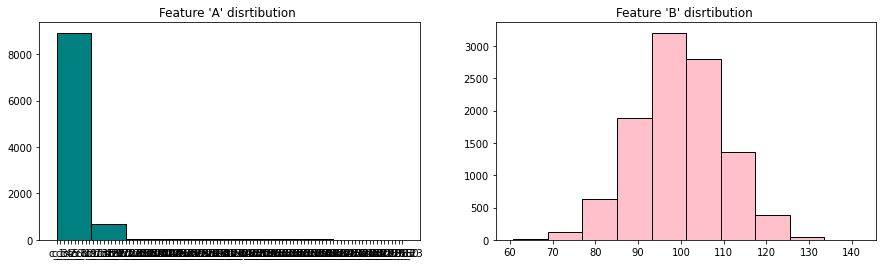

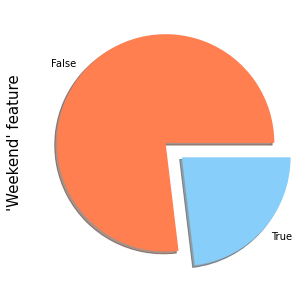

In [19]:
warnings.filterwarnings('ignore')
A_without_na=data_train_copy["A"].dropna() #A
B_without_na=data_train_copy['B'].dropna() #B

plt.figure(figsize=(15, 4))
plt.subplot(1 ,2, 1)
plt.hist(A_without_na,color="teal",edgecolor="black")
plt.title("Feature 'A' disrtibution ")

plt.subplot(1 ,2, 2)
plt.hist(B_without_na,color="pink",edgecolor="black")
plt.title("Feature 'B' disrtibution ")

#Weekend
explode=(0,0.2)
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
data_train_copy.groupby('Weekend').size().plot(kind='pie',explode=explode, colors=['coral','lightskyblue'], ax=ax1,shadow=True)
ax1.set_ylabel("'Weekend' feature", size=15)

Text(0.5, 1.0, "Feature 'D' disrtibution ")

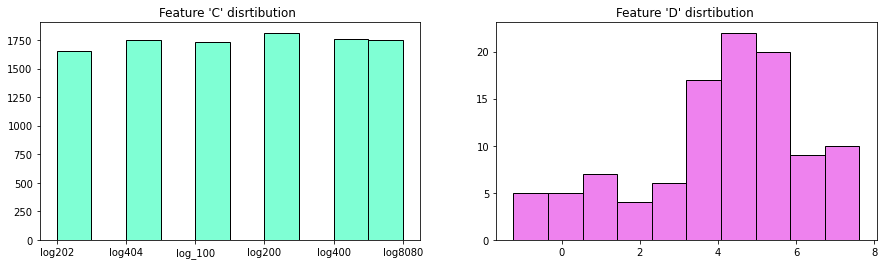

In [20]:
warnings.filterwarnings('ignore')
C_without_na=data_train_copy["C"].dropna() #C
D_without_na=data_train_copy['D'].dropna() #D

plt.figure(figsize=(15, 4))
plt.subplot(1 ,2, 1)
plt.hist(C_without_na,color="aquamarine",edgecolor="black")
plt.title("Feature 'C' disrtibution ")

plt.subplot(1 ,2, 2)
plt.hist(D_without_na,color="violet",edgecolor="black")
plt.title("Feature 'D' disrtibution ")


## As it seems, the only feature who's distribution seems similar to a Normal distribution is feature 'B'.  
## We can also identify that feature A, which is categorial feature, has many different values.
## Full description of the visualization in the report

# 2 - Preproccesing 

## - Outlires 

## According to the data, we have several truly numeric columns, which are:
## num_of_admin_pages, admin_page_duration, num_of_info_pages, info_page_duration, num_of_product_pages, product_page_duration, total_duration, BounceRates, ExitRates, PageValues, closeness_to_holiday, B, D. 
## Over All: 13.
## Notice that "device" and "region" are actually categorial variables. Also, ID is not very intresting, beacuse it's representing some random order of the data. 
## Notice info_page_duration and product_page_duration has string in each cell. We need to handle it.

## Let's handle info_page_duration  and product_page_duration.

In [21]:
for i in range(0,data_train_copy.shape[0]):
    if isinstance(data_train_copy.loc[i,'info_page_duration'], str) == True:
        data_train_copy.loc[i,'info_page_duration'] = data_train_copy.loc[i,'info_page_duration'].replace(' minutes','')
    if isinstance(data_train_copy.loc[i,'product_page_duration'], str) == True:
        data_train_copy.loc[i,'product_page_duration'] = data_train_copy.loc[i,'product_page_duration'].replace(' minutes','')

In [22]:
for i in range(0,data_test_copy.shape[0]): #same for 'test'
    if isinstance(data_test_copy.loc[i,'info_page_duration'], str) == True:
        data_test_copy.loc[i,'info_page_duration'] = data_test_copy.loc[i,'info_page_duration'].replace(' minutes','')
    if isinstance(data_test_copy.loc[i,'product_page_duration'], str) == True:
        data_test_copy.loc[i,'product_page_duration'] = data_test_copy.loc[i,'product_page_duration'].replace(' minutes','')


In [23]:
# We want to make sure that each numeric feature is identified as 'float'
data_train_copy['info_page_duration']=data_train_copy['info_page_duration'].apply(pd.to_numeric) 
data_train_copy['product_page_duration']=data_train_copy['product_page_duration'].apply(pd.to_numeric) 

In [24]:
data_test_copy['info_page_duration']=data_test_copy['info_page_duration'].apply(pd.to_numeric) 
data_test_copy['product_page_duration']=data_test_copy['product_page_duration'].apply(pd.to_numeric) 

In [25]:
data_train_copy.dtypes

id                         int64
num_of_admin_pages       float64
admin_page_duration      float64
num_of_info_pages        float64
info_page_duration       float64
num_of_product_pages     float64
product_page_duration    float64
total_duration           float64
BounceRates              float64
ExitRates                float64
PageValues               float64
closeness_to_holiday     float64
Month                     object
device                   float64
internet_browser          object
Region                   float64
user_type                 object
Weekend                   object
A                         object
B                        float64
C                         object
D                        float64
purchase                   int64
dtype: object

## Now, let's make sure we can target all our truly numeric columns

In [26]:
numeric = data_train_copy.select_dtypes(include=[float]).columns
numeric_features=list(set(numeric) - set(['device','Region']))
print(len(numeric_features))
print(numeric_features)


13
['ExitRates', 'total_duration', 'product_page_duration', 'num_of_info_pages', 'closeness_to_holiday', 'D', 'num_of_product_pages', 'B', 'BounceRates', 'PageValues', 'info_page_duration', 'admin_page_duration', 'num_of_admin_pages']


## Boxplot for numeric columns


## We know that in order to boxplot a feature, we need to assume normal distribution. For the purpose of handling outliers, we will assume that.
## Let's boxplot all of true numeric features (13)

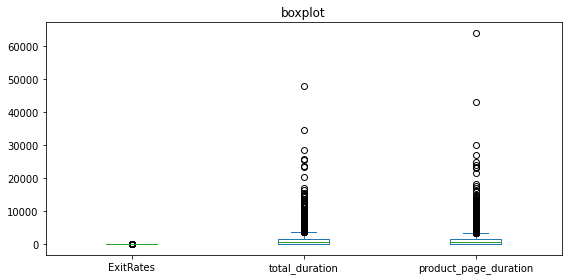

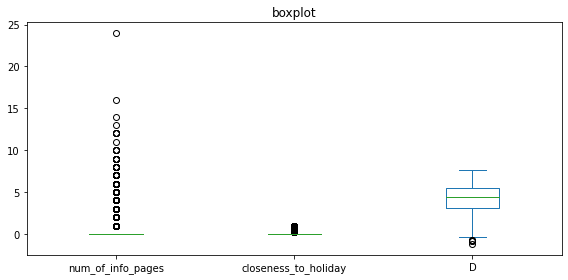

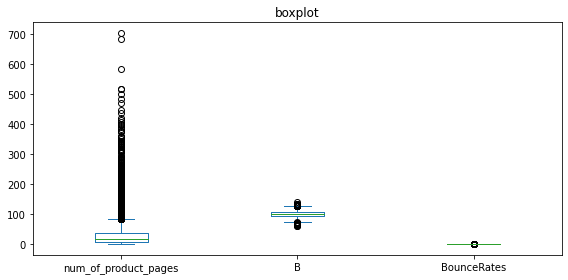

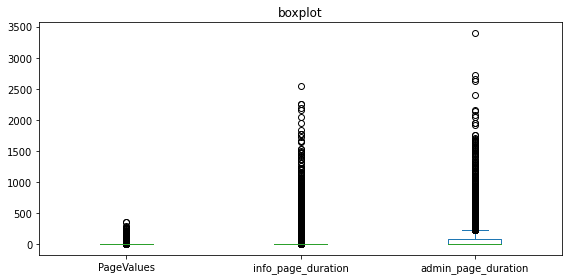

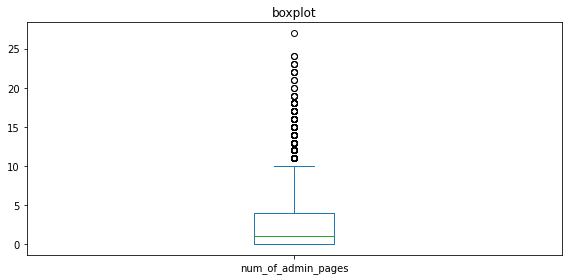

In [27]:
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True
# Plot the dataframe
ax = data_train_copy[numeric_features[0:3]].plot(kind='box', title='boxplot')
bx = data_train_copy[numeric_features[3:6]].plot(kind='box', title='boxplot')
cx = data_train_copy[numeric_features[6:9]].plot(kind='box', title='boxplot')
dx = data_train_copy[numeric_features[9:12]].plot(kind='box', title='boxplot')
ex = data_train_copy[numeric_features[12:14]].plot(kind='box', title='boxplot')
# Display the plot
plt.show()

## As we can see, some of the features have outliers. We want to reduce their impact. Therefore, we'll follow each feature, find it's outliers, and reaplce their value with the column's MEAN.

In [28]:
for feature in numeric_features:
    q1=data_train_copy[feature].quantile(0.25)
    q3=data_train_copy[feature].quantile(0.75)
    IQR=q3-q1
    upper = data_train_copy[feature][~(data_train_copy[feature]>(q3+1.5*IQR))].max()
    lower = data_train_copy[feature][~(data_train_copy[feature]<(q1-1.5*IQR))].min()
    print(feature,upper,lower,np.nanmean(data_train_copy[feature]))
    data_train_copy[feature] = np.where(data_train_copy[feature] > upper,
       np.nanmean(data_train_copy[feature]),
       np.where(
           data_train_copy[feature] < lower,
           np.nanmean(data_train_copy[feature]),
           data_train_copy[feature]
           )
       )
    print(data_train_copy[feature].value_counts(),'-------------------')


ExitRates 0.103333333 0.0 0.0428591114353774
0.042859    913
0.100000    292
0.050000    289
0.033333    257
0.066667    225
           ... 
0.051269      1
0.010302      1
0.014534      1
0.041143      1
0.029031      1
Name: ExitRates, Length: 4064, dtype: int64 -------------------
total_duration 3665.666667 0.0 1302.4572160133146
1302.457216    438
0.000000       332
17.000000        9
12.000000        9
19.000000        9
              ... 
591.250000       1
167.500000       1
1200.047619      1
1373.875000      1
21.250000        1
Name: total_duration, Length: 4374, dtype: int64 -------------------
product_page_duration 3400.248897 0.0 1197.518515991716
1197.518516    762
0.000000       594
17.000000       16
8.000000        16
15.000000       14
              ... 
1514.600000      1
253.554167       1
741.833333       1
1038.333333      1
346.000000       1
Name: product_page_duration, Length: 7042, dtype: int64 -------------------
num_of_info_pages 0.0 0.0 0.5026552287581699
0

## Let's handle outliers for test

In [29]:
for feature in numeric_features:
    q1=data_train_copy[feature].quantile(0.25)
    q3=data_train_copy[feature].quantile(0.75)
    IQR=q3-q1
    upper = data_train_copy[feature][~(data_train_copy[feature]>(q3+1.5*IQR))].max()
    lower = data_train_copy[feature][~(data_train_copy[feature]<(q1-1.5*IQR))].min()
    data_test_copy[feature] = np.where(data_test_copy[feature] > upper,
       np.nanmean(data_train_copy[feature]),
       np.where(
           data_test_copy[feature] < lower,
            np.nanmean(data_train_copy[feature]),
           data_test_copy[feature]
           )
       )
    print(data_test_copy[feature].value_counts(),'-------------------')


0.031060    249
0.066667     42
0.050000     39
0.040000     34
0.025000     31
           ... 
0.011728      1
0.005379      1
0.024381      1
0.025788      1
0.013953      1
Name: ExitRates, Length: 949, dtype: int64 -------------------
904.733438     110
0.000000        60
24.000000        5
56.000000        3
44.000000        3
              ... 
598.000000       1
994.575758       1
1137.166667      1
337.166667       1
1168.619841      1
Name: total_duration, Length: 810, dtype: int64 -------------------
819.292994     212
0.000000       113
24.000000        7
17.000000        5
13.000000        4
              ... 
90.750000        1
1373.950000      1
1900.896078      1
259.666667       1
1157.976190      1
Name: product_page_duration, Length: 1320, dtype: int64 -------------------
0.000000    1368
0.107749     357
Name: num_of_info_pages, dtype: int64 -------------------
0.000000    1581
0.006364     183
Name: closeness_to_holiday, dtype: int64 -------------------
4.295895    

## We've printed the value_counts() results for each numeric feature after handling it's outliers. Let's see the results via boxplots too!

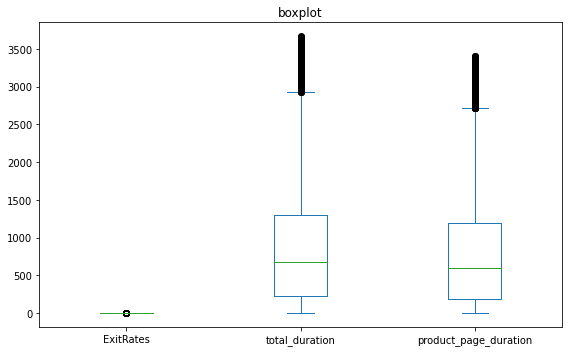

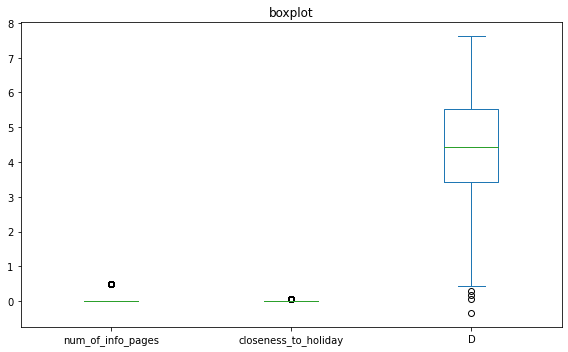

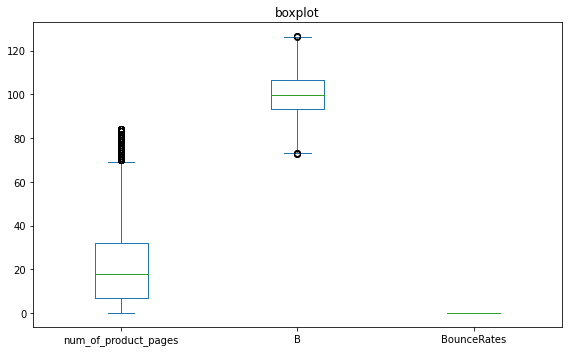

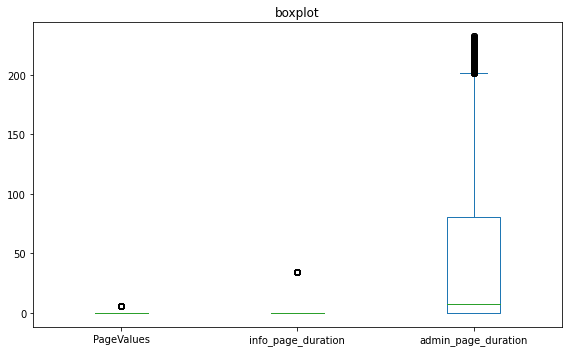

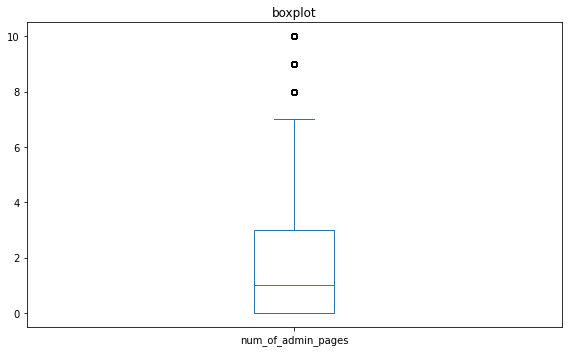

In [30]:
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True
# Plot the dataframe
ax = data_train_copy[numeric_features[0:3]].plot(kind='box', title='boxplot')
bx = data_train_copy[numeric_features[3:6]].plot(kind='box', title='boxplot')
cx = data_train_copy[numeric_features[6:9]].plot(kind='box', title='boxplot')
dx = data_train_copy[numeric_features[9:12]].plot(kind='box', title='boxplot')
ex = data_train_copy[numeric_features[12:14]].plot(kind='box', title='boxplot')
# Display the plot
plt.show()

## It looks much better!

## After we handled all of the numeric outliers, we want to deal with the categorial features, which are: Month, Weekend, internet_browser, user_type, device, Region, A, C. 
## Here, we can't use mathematics functions. So, we would like to deal with each feature differently.

## Target categorial features:

In [31]:
all_colls = data_train_copy.columns
cat_colls = list(set(all_colls) - set(numeric_features) - set(['id','purchase']))
print(cat_colls)

['Region', 'device', 'user_type', 'A', 'C', 'Month', 'internet_browser', 'Weekend']


## Feature 'internet browser':

<AxesSubplot:>

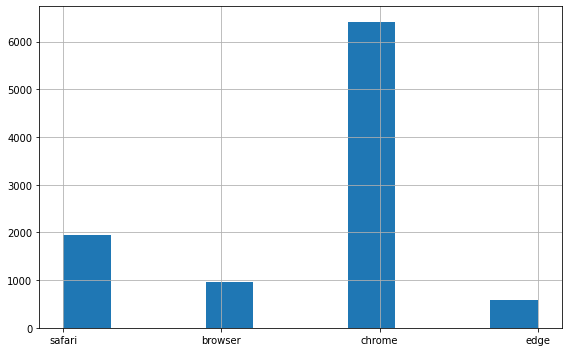

In [32]:
data_train_copy['internet_browser'].hist() 

## We've done some of the preprocess of this feature in the first part. No outliers here.

## Feature 'A':
## We have noticed at the vizualization part that feature A has lots of un-popular values. We will trace them and combine them into one group, called 'others_A'. We've decided that every value that has less than 200 apperiances in the column, would get the title 'others_A'. We have checked benith and saw that there are 10 values that has more then 200 apperiances.

<AxesSubplot:>

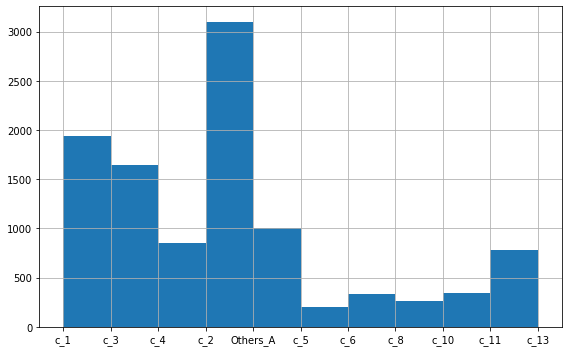

In [33]:
data_train_copy['A'].value_counts()[:10]
com_vals_A= data_train_copy['A'].value_counts()[:10].index.tolist()
for i in range(len(data_train_copy['A'])):
    if data_train_copy.loc[i,'A'] not in com_vals_A:
        data_train_copy.loc[i,'A'] = 'Others_A'

data_train_copy['A'].hist()

## For test set

In [34]:
data_train_copy['A'].value_counts()[:10]
for i in range(len(data_test_copy['A'])):
    if data_test_copy.loc[i,'A'] not in com_vals_A:
        data_test_copy.loc[i,'A'] = 'Others_A'

## Feature 'device':

In [35]:
data_train_copy['device'].value_counts()

2.0    5429
1.0    2130
3.0    2120
4.0     388
8.0      64
6.0      18
5.0       4
7.0       3
Name: device, dtype: int64

## We would like to keep only 4 of the categories. Categories '5,6,7,8' will switch into 'Others_device'

[2.0, 1.0, 3.0, 4.0]


<AxesSubplot:>

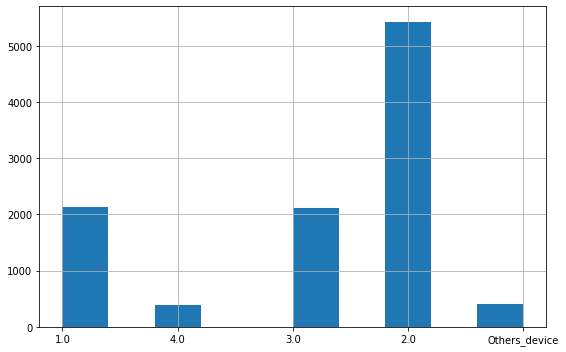

In [36]:
com_vals_device= data_train_copy['device'].value_counts()[:4].index.tolist()
print(com_vals_device)
for i in range(len(data_train_copy['device'])):
    if data_train_copy.loc[i,'device'] not in com_vals_device:
        data_train_copy.loc[i,'device'] = 'Others_device'
    else:
        data_train_copy.loc[i,'device'] = str(data_train_copy.loc[i,'device'])
data_train_copy['device'].hist()

## Featuer 'user_type':

In [37]:
data_train_copy['user_type'].value_counts()

Returning_Visitor    8956
New_Visitor          1428
Other                  72
Name: user_type, dtype: int64

## We can see that there are 72 'Other's. We would divide them to each group of values, randomly according to the feature's distribution

In [38]:
user_type_feature= data_train_copy['user_type'].value_counts()
index = list(user_type_feature.index)
index.remove('Other')
values = np.delete(user_type_feature.values,2)
p = (values/values.sum())

In [39]:
for i in range(len(data_train_copy['user_type'])):
    if data_train_copy.loc[i,'user_type'] == 'Other':
        list1=  np.random.choice(index ,p=p)
        data_train_copy.loc[i,'user_type'] = list1
user_type_feature #each 'Other' adsorbed to one of the values two groups.

Returning_Visitor    8956
New_Visitor          1428
Other                  72
Name: user_type, dtype: int64

<AxesSubplot:>

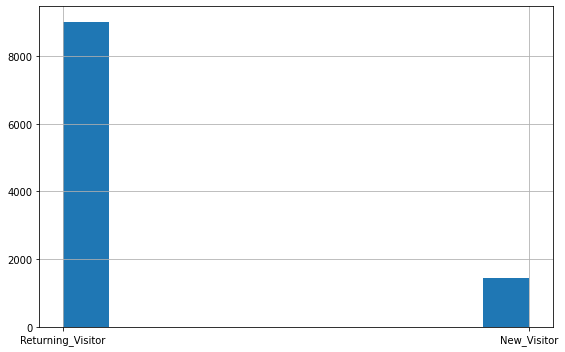

In [40]:
data_train_copy['user_type'].hist()

## For test set

In [41]:
for i in range(len(data_test_copy['user_type'])):
    if data_test_copy.loc[i,'user_type'] == 'Other':
        list1=  np.random.choice(index ,p=p)
        data_test_copy.loc[i,'user_type'] = list1

In [42]:
print(data_train_copy['C'].value_counts())
print(data_train_copy['Month'].value_counts())
print(data_train_copy['Region'].value_counts())
print(data_train_copy['Weekend'].value_counts())

log200     1813
log400     1760
log404     1754
log8080    1748
log_100    1731
log202     1650
Name: C, dtype: int64
May     2857
Nov     2539
Mar     1615
Dec     1450
Oct      471
Sep      379
Jul      367
Aug      365
June     248
Feb      163
Name: Month, dtype: int64
1.0    4056
3.0    2044
4.0     996
2.0     940
6.0     695
7.0     655
9.0     431
8.0     369
5.0     274
Name: Region, dtype: int64
False    8041
True     2415
Name: Weekend, dtype: int64


## According to the visualization and value_counts()  above, it seems that there is no need to change anything related to Outliers in 'C', 'Month', ' Region', 'Weekend'.
## --------------------------------------------------------------------------------------------------

## Now we're about to split the data into train&validation
## train set will be called from now on 'train_data'
## validation se will be called from now on 'validation_data'
## We will keep preprocces on the three sets together

In [43]:
data_train_names = data_train_copy.columns[:-1]
data_labels_names=data_train_copy.columns[-1]
X, y = data_train_copy.iloc[:,:-1].values, data_train_copy.iloc[:,-1]
print(f'X.shape: {X.shape}, y.shape: {y.shape}')


train_data,validation_data ,train_labels,validation_labels = train_test_split(X,y,
                                                        test_size = 0.2,
                                                        random_state= 42, 
                                                        shuffle=True)
print(f'val.shape: {validation_data.shape}, val.shape: {validation_labels.shape}')
train_data = pd.DataFrame(train_data)
train_data.set_axis(data_train_names,axis=1,inplace=True)
validation_data = pd.DataFrame(validation_data)
validation_data.set_axis(data_train_names,axis=1,inplace=True)

X.shape: (10479, 22), y.shape: (10479,)
val.shape: (2096, 22), val.shape: (2096,)


## ---------------------------------------------------------------------------------------------------------------------------
## We have noticed that feature 'D' has lots of missiing values. Therefore, we've decided to drop it.

In [44]:
print(train_data['D'].isnull().sum())
print(validation_data['D'].isnull().sum())
print(data_test_copy['D'].isnull().sum())
train_data = train_data.drop('D',axis=1)
validation_data = validation_data.drop('D',axis=1)
data_test_copy = data_test_copy.drop('D',axis=1)

8299
2075
1832


## Now, we'll fill the missing values.

In [45]:
numeric_features = list(set(numeric_features) - set(['D'])) ##updating numeric features list
numeric_features

['ExitRates',
 'total_duration',
 'product_page_duration',
 'closeness_to_holiday',
 'num_of_info_pages',
 'num_of_product_pages',
 'B',
 'num_of_admin_pages',
 'BounceRates',
 'info_page_duration',
 'admin_page_duration',
 'PageValues']

## For each numeric feature N/A cells we've inserted one of the following values: Mean/Median. We've inserted the MEDIAN where there was a logic behind keeping the values integers, for example - num_of_admin_pages, canno't contain fractions. For features that do contain fractions in their values, we've used the MEAN.

In [46]:
print(train_data['num_of_admin_pages'].value_counts())
median_num_admin = train_data['num_of_admin_pages'].median()
print(median_num_admin)
train_data['num_of_admin_pages'] = train_data['num_of_admin_pages'].fillna(median_num_admin)

print(train_data['admin_page_duration'].value_counts())
mean_admin_page = train_data['admin_page_duration'].mean()
print(mean_admin_page)
train_data['admin_page_duration'] = train_data['admin_page_duration'].fillna(mean_admin_page)

print(train_data['num_of_info_pages'].value_counts())
mean_num_info = train_data['num_of_info_pages'].mean()
print(mean_num_info)
train_data['num_of_info_pages'] = train_data['num_of_info_pages'].fillna(mean_num_info)

print(train_data['product_page_duration'].value_counts())
mean_prod_dur = train_data['product_page_duration'].mean()
print(mean_prod_dur)
train_data['product_page_duration'] = train_data['product_page_duration'].fillna(mean_prod_dur)

print(train_data['info_page_duration'].value_counts())
median_inf_dur = train_data['info_page_duration'].median()
print(median_inf_dur)
train_data['info_page_duration'] = train_data['info_page_duration'].fillna(median_inf_dur)

print(train_data['num_of_product_pages'].value_counts())
median_num_prod = train_data['num_of_product_pages'].median()
print(median_num_prod)
train_data['num_of_product_pages'] = train_data['num_of_product_pages'].fillna(median_num_prod)

print(train_data['closeness_to_holiday'].value_counts())
mean_close = train_data['closeness_to_holiday'].mean()
print(mean_close)
train_data['closeness_to_holiday'] = train_data['closeness_to_holiday'].fillna(mean_close)

print(train_data['total_duration'].value_counts())
mean_total = train_data['total_duration'].mean()
print(mean_total)
train_data['total_duration'] = train_data['total_duration'].fillna(mean_total)

print(train_data['PageValues'].value_counts())
mean_PageV = train_data['PageValues'].mean()
print(mean_PageV)
train_data['PageValues'] = train_data['PageValues'].fillna(mean_PageV) 

print(train_data['BounceRates'].value_counts())
mean_BonR = train_data['BounceRates'].mean()
print(mean_BonR)
train_data['BounceRates'] = train_data['BounceRates'].fillna(mean_BonR) 

print(train_data['B'].value_counts())
mean_B = train_data['B'].mean()
print(mean_B)
train_data['B'] = train_data['B'].fillna(mean_B)

print(train_data['ExitRates'].value_counts())
mean_ExitR = train_data['ExitRates'].mean()
print(mean_ExitR)
train_data['ExitRates'] = train_data['ExitRates'].fillna(mean_ExitR)



0.000000     3684
1.000000      859
2.000000      705
3.000000      597
4.000000      503
5.000000      352
6.000000      281
2.321957      270
7.000000      218
8.000000      183
9.000000      158
10.000000     101
Name: num_of_admin_pages, dtype: int64
1.0
0.000000      3850
80.462468      751
4.000000        39
5.000000        34
11.000000       28
              ... 
45.416667        1
124.500000       1
155.700000       1
47.166667        1
61.080000        1
Name: admin_page_duration, Length: 1684, dtype: int64
42.67124154958117
0.000000    6117
0.502655    1698
Name: num_of_info_pages, dtype: int64
0.10921414951136992
1197.518516    618
0.000000       479
17.000000       12
8.000000        12
19.000000       12
              ... 
1050.250000      1
1946.942857      1
326.500000       1
189.200000       1
2304.150000      1
Name: product_page_duration, Length: 5762, dtype: int64
825.4314260618607
0.000000     6516
34.323813    1616
Name: info_page_duration, dtype: int64
0.0
31.870

## Now we'll handle the categorial features. Again, in this case we can't use statistics, so we will fill the empty cells with existing values,by using a function that randomly divides the values according to their distribution

In [47]:
for i in cat_colls:
    s= train_data[i].value_counts(normalize=True)
    missing = train_data[i].isnull()
    train_data.loc[missing,i] = np.random.choice(s.index, size=len(train_data.loc[missing]),p=s.values)


In [48]:
train_data.isnull().sum()

id                       0
num_of_admin_pages       0
admin_page_duration      0
num_of_info_pages        0
info_page_duration       0
num_of_product_pages     0
product_page_duration    0
total_duration           0
BounceRates              0
ExitRates                0
PageValues               0
closeness_to_holiday     0
Month                    0
device                   0
internet_browser         0
Region                   0
user_type                0
Weekend                  0
A                        0
B                        0
C                        0
dtype: int64

## There are no missing values anymore (train) :)

##  We will take the conclusions from the training and impement them on the validation set.

In [49]:
validation_data['num_of_admin_pages'] = validation_data['num_of_admin_pages'].fillna(median_num_admin)
validation_data['admin_page_duration'] = validation_data['admin_page_duration'].fillna(mean_admin_page)
validation_data['num_of_info_pages'] = validation_data['num_of_info_pages'].fillna(mean_num_info)
validation_data['product_page_duration'] = validation_data['product_page_duration'].fillna(mean_prod_dur)
validation_data['info_page_duration'] = validation_data['info_page_duration'].fillna(median_inf_dur)
validation_data['num_of_product_pages'] = validation_data['num_of_product_pages'].fillna(median_num_prod)
validation_data['closeness_to_holiday'] = validation_data['closeness_to_holiday'].fillna(mean_close)
validation_data['total_duration'] = validation_data['total_duration'].fillna(mean_total)
validation_data['PageValues'] = validation_data['PageValues'].fillna(mean_PageV) 
validation_data['BounceRates'] = validation_data['BounceRates'].fillna(mean_BonR) 
validation_data['B'] = validation_data['B'].fillna(mean_B)
validation_data['ExitRates'] = validation_data['ExitRates'].fillna(mean_ExitR)

In [50]:
for i in cat_colls:
    s= train_data[i].value_counts(normalize=True)
    missing = validation_data[i].isnull()
    validation_data.loc[missing,i] = np.random.choice(s.index, size=len(validation_data.loc[missing]),p=s.values)

In [51]:
validation_data.isnull().sum()

id                       0
num_of_admin_pages       0
admin_page_duration      0
num_of_info_pages        0
info_page_duration       0
num_of_product_pages     0
product_page_duration    0
total_duration           0
BounceRates              0
ExitRates                0
PageValues               0
closeness_to_holiday     0
Month                    0
device                   0
internet_browser         0
Region                   0
user_type                0
Weekend                  0
A                        0
B                        0
C                        0
dtype: int64

## There are no missing values anymore (validation) :)

## Do the same thing for the test data

In [52]:
data_test_copy['num_of_admin_pages'] = data_test_copy['num_of_admin_pages'].fillna(median_num_admin)
data_test_copy['admin_page_duration'] = data_test_copy['admin_page_duration'].fillna(mean_admin_page)
data_test_copy['num_of_info_pages'] = data_test_copy['num_of_info_pages'].fillna(mean_num_info)
data_test_copy['product_page_duration'] = data_test_copy['product_page_duration'].fillna(mean_prod_dur)
data_test_copy['info_page_duration'] = data_test_copy['info_page_duration'].fillna(median_inf_dur)
data_test_copy['num_of_product_pages'] = data_test_copy['num_of_product_pages'].fillna(median_num_prod)
data_test_copy['closeness_to_holiday'] = data_test_copy['closeness_to_holiday'].fillna(mean_close)
data_test_copy['total_duration'] = data_test_copy['total_duration'].fillna(mean_total)
data_test_copy['PageValues'] = data_test_copy['PageValues'].fillna(mean_PageV) 
data_test_copy['BounceRates'] = data_test_copy['BounceRates'].fillna(mean_BonR) 
data_test_copy['B'] = data_test_copy['B'].fillna(mean_B)
data_test_copy['ExitRates'] = data_test_copy['ExitRates'].fillna(mean_ExitR)

In [53]:
for i in cat_colls:
    s= train_data[i].value_counts(normalize=True)
    missing = data_test_copy[i].isnull()
    data_test_copy.loc[missing,i] = np.random.choice(s.index, size=len(data_test_copy.loc[missing]),p=s.values)

In [54]:
data_test_copy.isnull().sum()

id                       0
num_of_admin_pages       0
admin_page_duration      0
num_of_info_pages        0
info_page_duration       0
num_of_product_pages     0
product_page_duration    0
total_duration           0
BounceRates              0
ExitRates                0
PageValues               0
closeness_to_holiday     0
Month                    0
device                   0
internet_browser         0
Region                   0
user_type                0
Weekend                  0
A                        0
B                        0
C                        0
dtype: int64

In [55]:
data_train.describe()

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,num_of_product_pages,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,device,Region,B,D,purchase
count,10479.00000,9874.000000,10066.000000,9792.000000,10076.000000,5726.000000,10457.000000,10453.000000,10452.000000,9983.000000,10156.000000,10460.000000,10456.000000,105.000000,10479.000000
mean,5239.00000,2.321957,80.462468,0.502655,31.870187,1302.457216,0.021854,0.042859,5.900387,0.061985,2.122981,3.155641,99.769628,4.060440,0.154690
std,3025.17107,3.335331,179.217548,1.265812,44.816259,2039.312905,0.048100,0.048297,18.727496,0.199429,0.906859,2.404672,10.050268,2.189818,0.361626
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,60.733919,-1.235571,0.000000
25%,2619.50000,0.000000,0.000000,0.000000,7.000000,221.000000,0.000000,0.014283,0.000000,0.000000,2.000000,1.000000,93.030568,3.141657,0.000000
50%,5239.00000,1.000000,8.000000,0.000000,18.000000,677.851191,0.002968,0.025161,0.000000,0.000000,2.000000,3.000000,99.787249,4.432221,0.000000
75%,7858.50000,4.000000,93.000000,0.000000,38.000000,1605.733333,0.016667,0.050000,0.000000,0.000000,3.000000,4.000000,106.506626,5.531061,0.000000
max,10478.00000,27.000000,3398.750000,24.000000,705.000000,47850.920680,0.200000,0.200000,361.763742,1.000000,8.000000,9.000000,141.735142,7.618254,1.000000


## There are no missing values anymore (test) :)

## -----------------------------------------------------------------------------------------------------------------------
## - Normalization

### The data is not normalaized. We should normalize it. Normalization is important, especially in customer related datas, beacuse it helps identify duplicate data, improves marketing segmentation, improve lead scoring & routing, inject more data into marketing automation, and identify, aggregate, or remove redundant data.

## Now, let's normalaize the train&validation data

In [56]:
scaler = StandardScaler()
scaler = scaler.fit(train_data[numeric_features])
train_data_numeric = scaler.transform(train_data[numeric_features].values)
validation_data_numeric = scaler.transform(validation_data[numeric_features].values)
train_data_numeric = pd.DataFrame(train_data_numeric)
train_data_numeric.set_axis(numeric_features,axis=1,inplace=True)
validation_data_numeric = pd.DataFrame(validation_data_numeric)
validation_data_numeric.set_axis(numeric_features,axis=1,inplace=True)

## Same for test data

In [57]:
data_test_copy_numeric = scaler.transform(data_test_copy[numeric_features])
data_test_copy_numeric = pd.DataFrame(data_test_copy_numeric)
data_test_copy_numeric.set_axis(numeric_features,axis=1,inplace=True)
data_test_copy_numeric

,ExitRates,total_duration,product_page_duration,closeness_to_holiday,num_of_info_pages,num_of_product_pages,B,num_of_admin_pages,BounceRates,info_page_duration,admin_page_duration,PageValues
0,-0.002907,-6.103240e-15,-1.013506e+00,-0.347945,-5.456760e-01,-1.109244,-0.744580,-0.764177,-0.805513,-0.488678,-7.699981e-01,-0.535303
1,-0.002907,-6.103240e-15,-1.095144e+00,-0.347945,-5.456760e-01,-1.109244,2.135987,-0.764177,-0.007107,-0.488678,-7.699981e-01,-0.535303
2,-0.002907,-1.476190e+00,-7.566161e-16,-0.347945,-5.456760e-01,-1.218141,-0.576585,-0.364768,-0.007107,-0.488678,-7.699981e-01,-0.535303
3,-0.002907,-1.424132e+00,-1.056099e+00,-0.347945,-5.456760e-01,-1.109244,1.672833,-0.764177,-0.805513,-0.488678,7.949435e-15,-0.535303
4,0.838983,-6.103240e-15,-1.014837e+00,-0.002501,-5.456760e-01,-1.000346,-0.602706,-0.764177,-0.805513,-0.488678,-7.699981e-01,-0.535303
...,...,...,...,...,...,...,...,...,...,...,...,...
1846,1.579813,-1.419251e+00,-1.052106e+00,-0.347945,-5.456760e-01,-1.054795,-0.981091,-0.764177,-0.805513,-0.488678,-7.699981e-01,-0.535303
1847,0.394485,-6.103240e-15,-9.549393e-01,-0.347945,-5.456760e-01,-0.945898,1.150771,-0.764177,-0.805513,-0.488678,-7.699981e-01,-0.535303
1848,-0.980593,4.249306e-01,4.568020e-01,-0.347945,-5.456760e-01,0.905357,1.410748,-0.764177,-0.805513,-0.488678,-7.699981e-01,-0.535303
1849,-0.406958,-4.361940e-03,-8.170580e-03,-0.347945,-5.456760e-01,1.232050,0.990574,-0.364768,0.068676,-0.488678,-4.271451e-01,-0.535303


# Now we have a scaled DataFrame of the numeric features for each set. We'll combine the numeric data with the categorial data for each set

In [58]:
new_all_cols=train_data.columns

In [59]:
warnings.filterwarnings('ignore')
## identify categorial features we would like to recombine with the numeric feature
train_data_other_features = train_data[set(new_all_cols)-set(numeric_features)]
validation_data_other_features = validation_data[set(new_all_cols)-set(numeric_features)]
data_test_copy_other_features = data_test_copy[set(new_all_cols)-set(numeric_features)]

In [60]:
## combining the data
frames_train = [train_data_numeric,train_data_other_features]
  
train_data = pd.concat(frames_train, axis=1, join='inner')

frames_validation = [validation_data_numeric,validation_data_other_features]

validation_data = pd.concat(frames_validation, axis=1, join='inner')

frames_test = [data_test_copy_numeric,data_test_copy_other_features]

data_test_copy = pd.concat(frames_test, axis=1, join='inner')

In [61]:
## handeling 'Weekend' feature so it will be easy to preprocess (making it dtype int instead of object)
train_data['Weekend'] = train_data['Weekend'].replace({'False':0,'True':1})
train_data['Weekend'] = train_data['Weekend'].astype(int)
validation_data['Weekend'] = validation_data['Weekend'].replace({'False':0,'True':1})
validation_data['Weekend'] = validation_data['Weekend'].astype(int)
data_test_copy['Weekend'] = data_test_copy['Weekend'].replace({'False':0,'True':1})
data_test_copy['Weekend'] = data_test_copy['Weekend'].astype(int)


## ------------------------------------------------------------------------------------------------------------------------
## - Demansionality reduction
### In principle, the rule of thumb is that the number of features in the data should be approximately equal to the square root of the number of examples. The number of features - 22, is much lower than that. According to this rule, the demansionality is not too big. Large dimensionality (or in its name - the curse of dimensionality) refers to various phenomena that arise when analyzing data in high-dimensional spaces. One phenomenon is the Hughes phenomenon, which states that with a fixed number of training examples, the average predictive power initially increases as the number of dimensions increases, but beyond a certain dimension it begins to deteriorate instead of steadily improving. Too high dimension can be identified by over-fitting a model - if the model evaluation results are significantly better in running the model on the training set (on which the model trained), relative to the test set on which the model is tested - we will identify the over-fitting phenomenon, which can indicate high complexity  (high variance but low bias).

## Now, we would like to reduce demansionality. First, we want to handle the categorial features. We'll create a correlation matrix, and see if there are any correlated features.

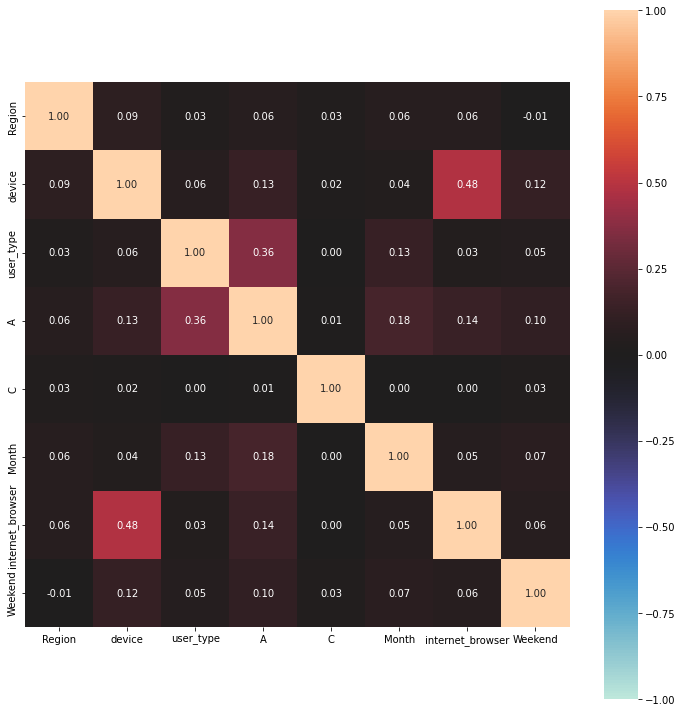

In [62]:
selected_column= train_data[cat_colls]
categorical_df = selected_column.copy()
categorical_correlation= associations(categorical_df, filename= 'categorical_correlation.png', figsize=(10,10))

## As it seems, there are no strong correlations between our categorial features. Therefore, we'll use chi test to check which of them is more important.

In [63]:
cat_data_train = train_data[cat_colls].astype(str)
cat_data_val = validation_data[cat_colls].astype(str)

Feature 0: 2.264417
Feature 1: 2.822761
Feature 2: 15.392387
Feature 3: 19.423714
Feature 4: 1.657409
Feature 5: 52.394600
Feature 6: 0.030056
Feature 7: 8.308896


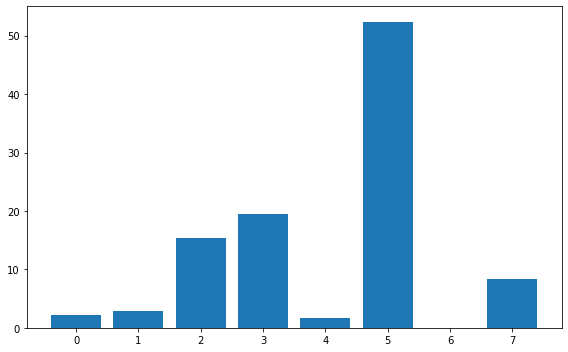

['Region', 'device', 'user_type', 'A', 'C', 'Month', 'internet_browser', 'Weekend']


In [64]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot


#prepare input data
def prepare_inputs(train_data, validation_data):
    oe = OrdinalEncoder()
    oe.fit(train_data)
    X_train_enc = oe.transform(train_data)
    X_val_enc = oe.transform(validation_data)
    return X_train_enc, X_val_enc
 
# prepare target
def prepare_targets(train_labels, validation_labels):
    le = LabelEncoder()
    le.fit(train_labels)
    y_train_enc = le.transform(train_labels)
    y_test_enc = le.transform(validation_labels)
    return y_train_enc, y_test_enc

#feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 

# split into train and test sets
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(cat_data_train, cat_data_val)
y_train_enc, y_test_enc = prepare_targets(train_labels, validation_labels)
    #feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
    #what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    #plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()
print(cat_colls)

## it seems that the best categorial features are:
### user_type
### Month
### A


## Now let's run Forward selection algorithem over our numeric features and see the results.

In [65]:
numeric_data=train_data[numeric_features]

In [66]:
warnings.filterwarnings('ignore')
lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=9, forward=True, verbose=2, scoring='neg_mean_squared_error')
sfs1 = sfs1.fit(numeric_data, train_labels)
feat_names = list(sfs1.k_feature_names_)
print('Best features --->' ,feat_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2022-12-11 15:54:05] Features: 1/9 -- score: -0.08428930023211038[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2022-12-11 15:54:05] Features: 2/9 -- score: -0.08349137559091417[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2022-12-11 15:54:05] Features: 3/9 -- score: -0.08321883296062663[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

Best features ---> ['ExitRates', 'closeness_to_holiday', 'num_of_product_pages', 'B', 'num_of_admin_pages', 'BounceRates', 'info_page_duration', 'admin_page_duration', 'PageValues']



[2022-12-11 15:54:06] Features: 9/9 -- score: -0.08247076245217802

## We've checked both numeric and categorial features separetly, and we've found out that the most important features are: 
### num_of_admin_pages
### num_of_product_pages
### closeness_to_holiday
### info_page_duration
### ExitRates 
### PageValues
### BounceRates 
### admin_page_duration 
### B
## We will continue with those features.

In [68]:
chosen_features = feat_names+['Month','A','user_type']
train_data = train_data[chosen_features]
validation_data = validation_data[chosen_features]
data_test_copy = data_test_copy[chosen_features]

## Now, we would like to check the correlations between the features in the updated data (with the chosen features).

<AxesSubplot:>

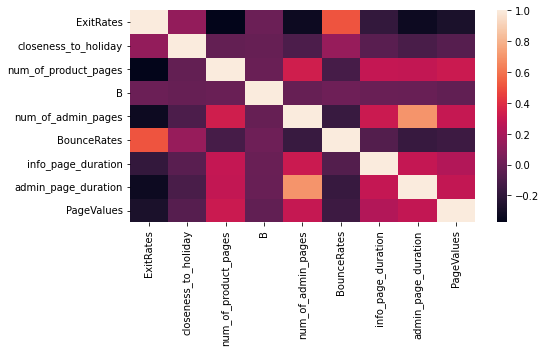

In [69]:
corr = train_data.corr()
sns.heatmap(corr)

## We can see that there is a high correlation between 'num_of_admin_pages' and 'admin_page_duration'. We chose to drop 'num_of_admin_pages'

In [70]:
train_data = train_data.drop('num_of_admin_pages',axis=1)
validation_data = validation_data.drop('num_of_admin_pages',axis=1)
data_test_copy = data_test_copy.drop('num_of_admin_pages',axis=1)

## -------------------------------------------------------------------------------------------------------------
## Now, we'll use OneHotEncoder on our data sets

In [71]:
cat_colls_new = ['A','Month','user_type']

In [72]:
transformer_train = make_column_transformer(
    (OneHotEncoder(), cat_colls_new),
    remainder='passthrough')

transformed = transformer_train.fit_transform(train_data)
train_data = pd.DataFrame(transformed, columns=transformer_train.get_feature_names_out())
train_data

,onehotencoder__A_Others_A,onehotencoder__A_c_1,onehotencoder__A_c_10,onehotencoder__A_c_11,onehotencoder__A_c_13,onehotencoder__A_c_2,onehotencoder__A_c_3,onehotencoder__A_c_4,onehotencoder__A_c_5,onehotencoder__A_c_6,onehotencoder__A_c_8,onehotencoder__Month_Aug,onehotencoder__Month_Dec,onehotencoder__Month_Feb,onehotencoder__Month_Jul,onehotencoder__Month_June,onehotencoder__Month_Mar,onehotencoder__Month_May,onehotencoder__Month_Nov,onehotencoder__Month_Oct,onehotencoder__Month_Sep,onehotencoder__user_type_New_Visitor,onehotencoder__user_type_Returning_Visitor,remainder__ExitRates,remainder__closeness_to_holiday,remainder__num_of_product_pages,remainder__B,remainder__BounceRates,remainder__info_page_duration,remainder__admin_page_duration,remainder__PageValues
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.240120,-0.347945,0.415319,-0.182059,-0.805513,-0.488678,-4.451900e-01,-0.535303
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.072807,-0.347945,-0.619205,1.237945,1.167016,-0.488678,2.044263e-01,-0.535303
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.381365,-0.347945,1.722088,0.175157,-0.455838,2.046338,-7.699981e-01,-0.535303
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.076159,-0.347945,-0.346962,-0.043420,-0.805513,-0.488678,7.949435e-15,-0.535303
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.395733,-0.347945,-0.728103,0.757764,-0.805513,-0.488678,-7.699981e-01,-0.535303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8378,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.274049,-0.347945,0.517149,0.294068,0.430368,-0.488678,6.819387e-01,-0.535303
8379,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.889620,-0.347945,-0.238065,-1.339779,-0.805513,-0.488678,-6.075940e-01,-0.535303
8380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.659905,-0.347945,0.905357,-2.181138,-0.805513,-0.488678,3.321841e-01,-0.535303
8381,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.272261,-0.347945,-0.782552,0.038143,-0.805513,-0.488678,-7.699981e-01,-0.535303


In [73]:
transformer_val = make_column_transformer(
    (OneHotEncoder(), cat_colls_new ),
    remainder='passthrough')

transformed = transformer_val.fit_transform(validation_data)
validation_data = pd.DataFrame(transformed, columns=transformer_val.get_feature_names_out())
validation_data

,onehotencoder__A_Others_A,onehotencoder__A_c_1,onehotencoder__A_c_10,onehotencoder__A_c_11,onehotencoder__A_c_13,onehotencoder__A_c_2,onehotencoder__A_c_3,onehotencoder__A_c_4,onehotencoder__A_c_5,onehotencoder__A_c_6,onehotencoder__A_c_8,onehotencoder__Month_Aug,onehotencoder__Month_Dec,onehotencoder__Month_Feb,onehotencoder__Month_Jul,onehotencoder__Month_June,onehotencoder__Month_Mar,onehotencoder__Month_May,onehotencoder__Month_Nov,onehotencoder__Month_Oct,onehotencoder__Month_Sep,onehotencoder__user_type_New_Visitor,onehotencoder__user_type_Returning_Visitor,remainder__ExitRates,remainder__closeness_to_holiday,remainder__num_of_product_pages,remainder__B,remainder__BounceRates,remainder__info_page_duration,remainder__admin_page_duration,remainder__PageValues
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.205707,-0.347945,-0.673654,0.301975,-0.805513,-0.488678,-0.769998,-0.535303
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.950228,-0.347945,-0.782552,1.705407,-0.805513,-0.488678,-0.769998,-0.535303
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.642676,3.016510,-0.401411,0.463676,-0.805513,-0.488678,-0.769998,-0.535303
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.215610,-0.347945,1.232050,-0.142295,-0.114161,2.046338,0.490137,1.872121
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.394485,-0.347945,-0.945898,-0.651065,-0.805513,-0.488678,-0.769998,-0.535303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.510570,-0.347945,1.123152,-1.254411,-0.368419,-0.488678,0.941380,-0.535303
2092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.827884,-0.347945,-0.891449,-1.104552,-0.805513,-0.488678,0.681939,-0.535303
2093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.209398,3.016510,-0.782552,-1.300070,1.295970,-0.488678,-0.769998,-0.535303
2094,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.061473,-0.347945,-1.109244,0.092967,-0.805513,-0.488678,-0.769998,-0.535303


In [74]:
ct = ColumnTransformer(
    [('onehotencoder', OneHotEncoder(sparse=False), cat_colls_new),],  # the column numbers I want to apply this to
    remainder='passthrough'  # This leaves the rest of my columns in place
)
data_test_copy = pd.DataFrame(ct.fit_transform(data_test_copy),columns=ct.get_feature_names_out())

## Let's check the data sets shape

In [75]:
train_data.shape

(8383, 31)

In [76]:
validation_data.shape

(2096, 31)

In [77]:
data_test_copy.shape

(1851, 31)

## -------------------------------------------------------------------------------------------------------------------------------

# 3 - Models
## For each model we've used GridSearch in order to choose the best hyperparameters for the selected model.

## Basic models

## Logistic Regression Model

In [78]:
# using GridSerach to pick the best parameters
warnings.filterwarnings('ignore')
param_grid = {'solver': ['lbfgs', 'liblinear', 'saga'],
              'penalty': [ 'l1', 'l2', 'elasticnet'],
              'C': [ 10, 1.0, 0.1]}
grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3)
 
#fitting the model for grid search
grid.fit(train_data, train_labels)
print('best parameters:',grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print('best estimatoer:',grid.best_estimator_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ......C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=10, penalty=l1, solver=liblinear;, score=0.893 total time=   0.3s
[CV 2/5] END C=10, penalty=l1, solver=liblinear;, score=0.902 total time=   0.5s
[CV 3/5] END C=10, penalty=l1, solver=liblinear;, score=0.891 total time=   0.3s
[CV 4/5] END C=10, penalty=l1, solver=liblinear;, score=0.904 total time=   0.2s
[CV 5/5] END C=10, penalty=l1, solver=liblinear;, score=0.892 total time=   0.3s
[CV 1/5] END .....C=10, penalty=l1, solver=saga;, score=0.893 total time=   0.2s
[CV 2/5] END .....C=10, penalty=l1, solver=saga

[CV 1/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.890 total time=   0.0s
[CV 2/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.903 total time=   0.0s
[CV 3/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.895 total time=   0.0s
[CV 4/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.903 total time=   0.0s
[CV 5/5] END ....C=0.1, penalty=l1, solver=saga;, score=0.899 total time=   0.0s
[CV 1/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.893 total time=   0.0s
[CV 2/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.902 total time=   0.0s
[CV 3/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.892 total time=   0.0s
[CV 4/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.903 total time=   0.0s
[CV 5/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.893 total time=   0.0s
[CV 1/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.891 total time=   0.0s
[CV 2/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.902 total time=   0.0s
[CV 3/5] END C=0.1, penalt

In [79]:
clf = LogisticRegression(C= 0.1, penalty= 'l1', solver= 'saga').fit(train_data,train_labels)
log_pre_val = clf.predict_proba(validation_data)[::,1] ## for auc val
log_pre_train = clf.predict_proba(train_data)[::,1] ## for auc train
predictions_logistic_validation = clf.predict(validation_data) ## for accuracy val
predictions_logistic_train = clf.predict(train_data) ##for accuracy train
print(clf.predict_proba(train_data)[::,1])

[0.04242409 0.01469538 0.02674102 ... 0.02701464 0.03377964 0.75349856]


## GaussianNB Model

In [80]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
## What is Var_smoothing?
## var_smoothing is a stability calculation to widen (or smooth) the curve and therefore account for more samples that are further away from the distribution mean.
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(train_data, train_labels)
best_est_nb=nbModel_grid.best_estimator_
print('best parameter for GaussianNB model:',nbModel_grid.best_params_)
print('best estimatoer:',best_est_nb)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
best parameter for GaussianNB model: {'var_smoothing': 0.657933224657568}
best estimatoer: GaussianNB(var_smoothing=0.657933224657568)


In [81]:
gauss_pred_val = nbModel_grid.predict_proba(validation_data)[::,1] ## for auc val
gauss_pred_train = nbModel_grid.predict_proba(train_data)[:,1] ## for auc train
predictions_gaus_validation = clf.predict(validation_data) ## for accuracy val
predictions_gaus_train = clf.predict(train_data) ## for accuracy train

## Complex models

## Svm Model

In [83]:
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf','linear']}
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
 
#fitting the model for grid search
grid.fit(train_data, train_labels)
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.844 total time=   2.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.844 total time=   2.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.844 total time=   2.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.844 total time=   2.8s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.844 total time=   2.7s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.875 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.892 total time=   0.5s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.871 total time=   0.5s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.896 total time=   0.5s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.892 total time=   0.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;

In [84]:
clf_svm = svm.SVC(kernel='rbf',C=1,gamma=0.1,probability=True)
clf_svm.fit(train_data,train_labels)
svm_pred_validation = clf_svm.predict_proba(validation_data)[:,1] ## for auc val
svm_pred_train = clf_svm.predict_proba(train_data)[:,1] ## for auc train
predictions_SVM_validation = clf_svm.predict(validation_data) ## for auc val
predictions_SVM_train = clf_svm.predict(train_data) ## for auc train

## Random Forest Model

In [85]:
params = {'n_estimators': [200,300],'criterion':['entropy', 'gini'],'min_samples_leaf':[1,2,4],'max_depth':[12,14],'min_samples_split':[2,4] }
random_forest = RandomForestClassifier(random_state=0)
gridsearch = GridSearchCV(random_forest, params, scoring='roc_auc', refit= True)
gridsearch.fit(train_data, train_labels)
best_est= gridsearch.best_estimator_
print(best_est)
print(gridsearch.best_params_)

RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_split=4,
                       n_estimators=300, random_state=0)
{'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}


In [86]:
## best_est is already signed with the best parameters.
RFC_pred_validation = best_est.predict_proba(validation_data)[::,1] ## for auc val
RFC_pred_train = best_est.predict_proba(train_data)[::,1] ## for auc train
predictions_RFC_validation = best_est.predict(validation_data) ## for accuracy val
predictions_RFC_train = best_est.predict(train_data) ## for accuracy train

# 4 - Model evaluation

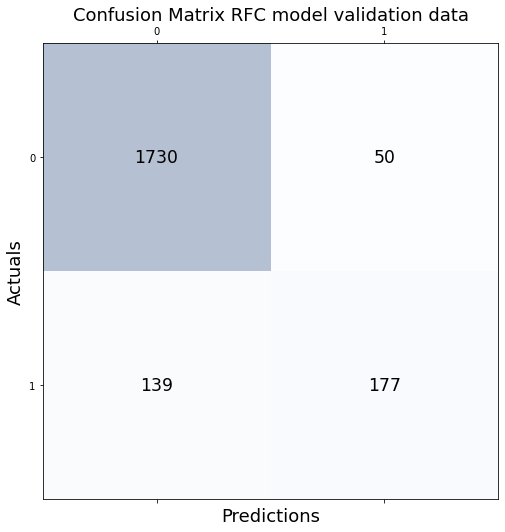

In [87]:
conf_matrix = confusion_matrix(validation_labels, predictions_RFC_validation)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix RFC model validation data', fontsize=18)
plt.show()


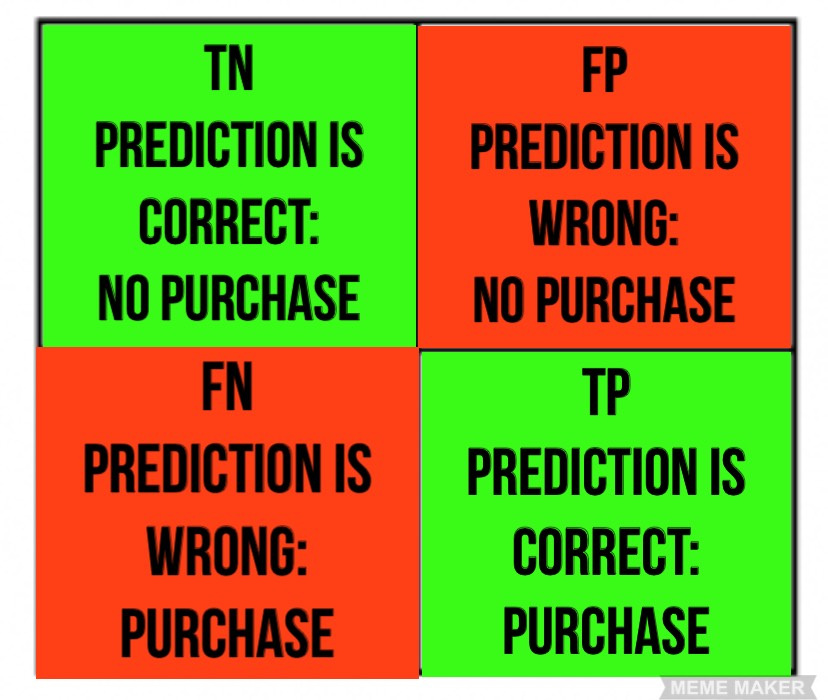

## According to the confusion matrix:
### TN = 1731 - there are approximatly 1731 non purchases  the model labeled correctly.
### FP = 49 - there are approximatly 49 non purchases the model wrongly labeled as purchases.
### FN = 136 - there are approximatly 136 purchases the model wrongly labeled as non purchases. 
### TP = 180 - there are approximatly 180 non purchases th model labeled correctly.

## *The numbers may change a bit  in each run*

## Let's talk about recall&precision

### Recall: The ability of a model to find all the relevant cases within a data set.
### Precision: The ability of a classification model to identify only the relevant data points.
### Ther is a trade-off between these two measures. When we increase the recall, we decrease the precision.
### To put it simply, precision is the ability to get the highest ratio customers who make a purchase recall is the ability to not miss out on customers who make a purchase .

## Let's calculate the recall&precision scores:
### Recall: 180/(180+136) = 0.56
### precision: 180/(180+49) = 0.78

### In our case, we have a pretty low recall score: it means that the model is not very good at identifing purchses.
### The percision score is much higher, which means most of the time our model is not missing out purchases.

## Let's run Kfold cross validation on each one of the models and see the results

## -  Logistic regression AUC&ACCURACY Kfold cross validation scores

In [88]:
scores_logistic = cross_val_score(clf, train_data, train_labels, cv=5)
print("%0.5f accuracy with a standard deviation of %0.5f" % (scores_logistic.mean(), scores_logistic.std()))

0.89789 accuracy with a standard deviation of 0.00509


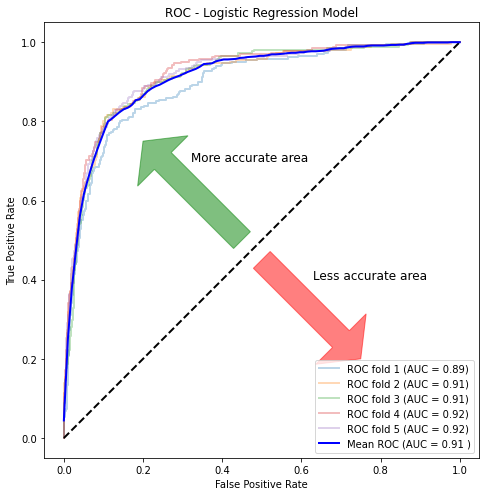

In [89]:
warnings.filterwarnings('ignore') 
## Logistic regression model
cv = StratifiedKFold(n_splits=5,shuffle=False)
fig1 = plt.figure(figsize=[7,7])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(train_data,train_labels):
    prediction = clf.fit(pd.DataFrame(train_data).iloc[train],pd.DataFrame(train_labels).iloc[train]).predict_proba(pd.DataFrame(train_data).iloc[test])
    fpr, tpr, t = roc_curve(train_labels.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Logistic Regression Model')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

## -  GaussianNB AUC&ACCURACY Kfold cross validation scores

In [90]:
scores_nb = cross_val_score(best_est_nb, train_data, train_labels, cv=5)
print("%0.5f accuracy with a standard deviation of %0.5f" % (scores_nb.mean(), scores_nb.std()))

0.87678 accuracy with a standard deviation of 0.00499


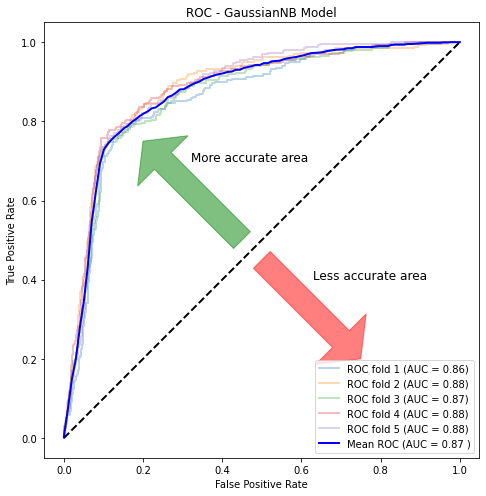

In [91]:
warnings.filterwarnings('ignore')
## GaussianNB model
cv = StratifiedKFold(n_splits=5,shuffle=False)
fig1 = plt.figure(figsize=[7,7])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(train_data,train_labels):
    prediction = best_est_nb.fit(pd.DataFrame(train_data).iloc[train],pd.DataFrame(train_labels).iloc[train]).predict_proba(pd.DataFrame(train_data).iloc[test])
    fpr, tpr, t = roc_curve(train_labels.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - GaussianNB Model')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

## -  SVM AUC&ACCURACY Kfold cross validation scores

In [92]:
scores_svm = cross_val_score(clf_svm, train_data, train_labels, cv=5)
print("%0.5f accuracy with a standard deviation of %0.5f" % (scores_svm.mean(), scores_svm.std()))

0.90111 accuracy with a standard deviation of 0.00481


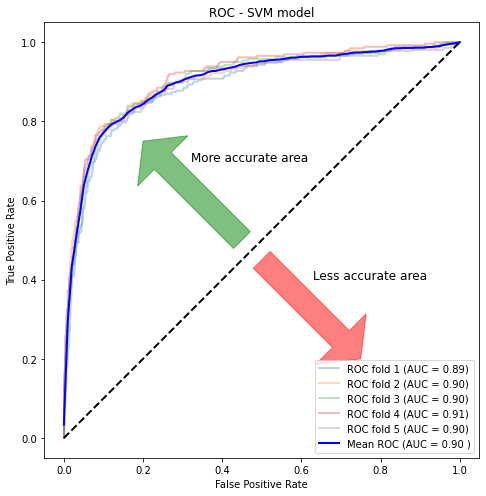

In [93]:
warnings.filterwarnings('ignore')
## Svm model
cv = StratifiedKFold(n_splits=5,shuffle=False)
fig1 = plt.figure(figsize=[7,7])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(train_data,train_labels):
    prediction = clf_svm.fit(pd.DataFrame(train_data).iloc[train],pd.DataFrame(train_labels).iloc[train]).predict_proba(pd.DataFrame(train_data).iloc[test])
    fpr, tpr, t = roc_curve(train_labels.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - SVM model')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

## -  RFC AUC&ACCURACY Kfold cross validation scores

In [94]:
scores_RFC = cross_val_score(best_est, train_data, train_labels, cv=5)
print("%0.5f accuracy with a standard deviation of %0.5f" % (scores_RFC.mean(), scores_RFC.std()))

0.90206 accuracy with a standard deviation of 0.00328


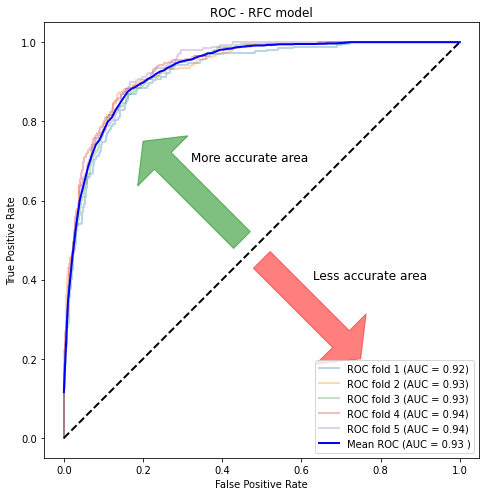

In [95]:
warnings.filterwarnings('ignore')
## RFC model
cv = StratifiedKFold(n_splits=5,shuffle=False)
fig1 = plt.figure(figsize=[7,7])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(train_data,train_labels):
    prediction = best_est.fit(pd.DataFrame(train_data).iloc[train],pd.DataFrame(train_labels).iloc[train]).predict_proba(pd.DataFrame(train_data).iloc[test])
    fpr, tpr, t = roc_curve(train_labels.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - RFC model')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

## Now, let's evaluate our model using our validation set.
## Notice we'll also predict the train set in order to identify over fitting...

## Scores for logistic regression:

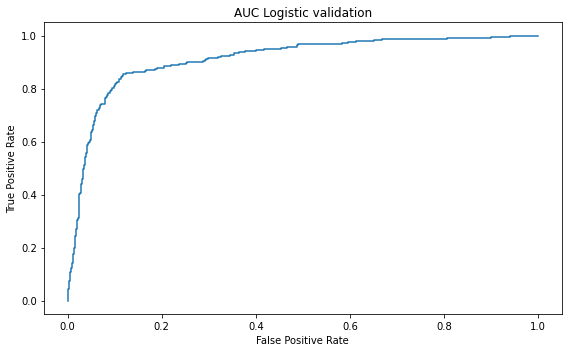

Logistic AUC Score valiation ->  0.9110403925472905
Logistic Accuracy Score valiation ->  0.8993320610687023


In [96]:
fpr_log_val, tpr_log_val, thresholds_log_val = metrics.roc_curve(validation_labels,log_pre_val)

plt.plot(fpr_log_val,tpr_log_val)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title('AUC Logistic validation')
plt.show()

auc_log_val = metrics.roc_auc_score(validation_labels, log_pre_val)
print("Logistic AUC Score valiation -> ",auc_log_val)
print("Logistic Accuracy Score valiation -> ",accuracy_score(predictions_logistic_validation, validation_labels))

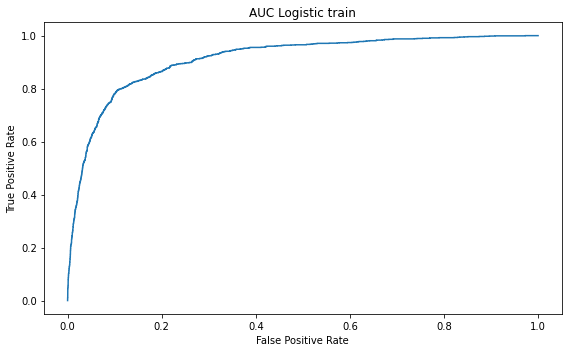

Logistic AUC Score train -> 0.9119255715459592
logistic Accuracy Score valiation ->  0.8980078730764642


In [97]:
auc_log_train = metrics.roc_auc_score(train_labels, log_pre_train)

fpr_log_train, tpr_log_train, thresholds_log_train = metrics.roc_curve(train_labels,log_pre_train)

plt.plot(fpr_log_train,tpr_log_train)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title('AUC Logistic train')
plt.show()

auc_log_train = metrics.roc_auc_score(train_labels, log_pre_train)
print("Logistic AUC Score train ->", auc_log_train)
print("logistic Accuracy Score valiation -> ",accuracy_score(predictions_logistic_train, train_labels))


## Scores for GaussianNB

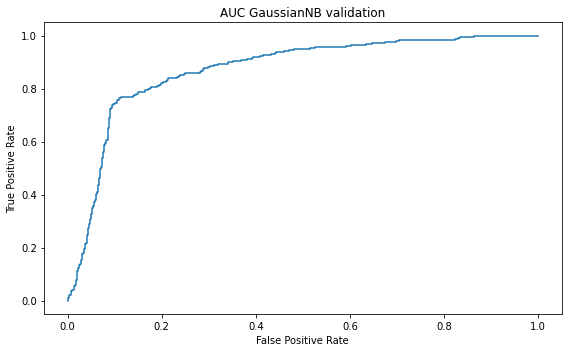

Gaussian AUC Score validation -> : 0.871088749822216
Gaussian Accuracy Score validation ->  0.8993320610687023


In [98]:
auc_gauss_val = metrics.roc_auc_score(validation_labels, gauss_pred_val)

fpr_gauss_val, tpr_gauss_val, thresholds_gauss_val = metrics.roc_curve(validation_labels,gauss_pred_val)

plt.plot(fpr_gauss_val,tpr_gauss_val)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title ('AUC GaussianNB validation')
plt.show()

print("Gaussian AUC Score validation -> :",auc_gauss_val)
print("Gaussian Accuracy Score validation -> ",accuracy_score(predictions_gaus_validation, validation_labels))

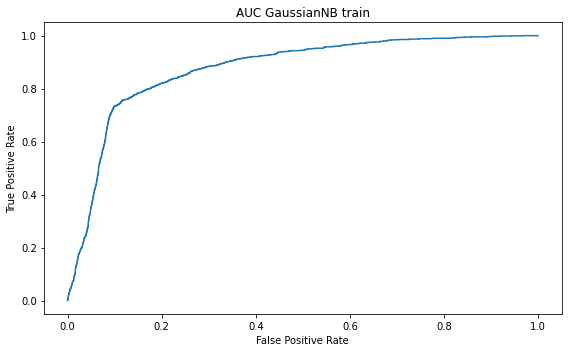

Gaussian AUC Score train -> : 0.8751758998526544
Gaussian Accuracy Score train ->  0.8980078730764642


In [99]:
auc_gauss_train = metrics.roc_auc_score(train_labels, gauss_pred_train)

fpr_gauss_train, tpr_gauss_train, thresholds_gauss_train = metrics.roc_curve(train_labels,gauss_pred_train)

plt.plot(fpr_gauss_train,tpr_gauss_train)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title ('AUC GaussianNB train')
plt.show()

print("Gaussian AUC Score train -> :",auc_gauss_train)
print("Gaussian Accuracy Score train -> ",accuracy_score(predictions_gaus_train, train_labels))

## Scores for SVM

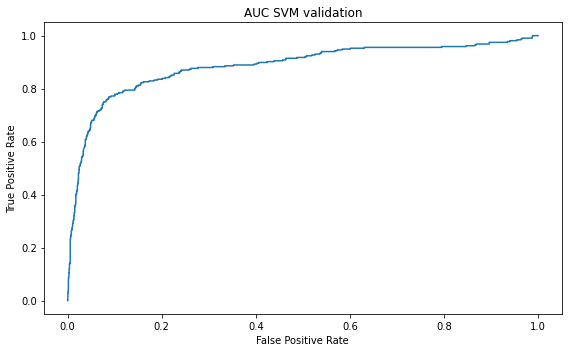

SVM AUC Score validation ->  0.8848456834020766
SVM Accuracy Score validation ->  0.9064885496183206


In [100]:
auc_svm_validation = metrics.roc_auc_score(validation_labels, svm_pred_validation)

fpr_svm_valiation, tpr_svm_validation, thresholds_svm_validation = metrics.roc_curve(validation_labels,svm_pred_validation)

plt.plot(fpr_svm_valiation,tpr_svm_validation)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title ('AUC SVM validation')
plt.show()

print("SVM AUC Score validation -> ",auc_svm_validation)
print("SVM Accuracy Score validation -> ",accuracy_score(predictions_SVM_validation, validation_labels))

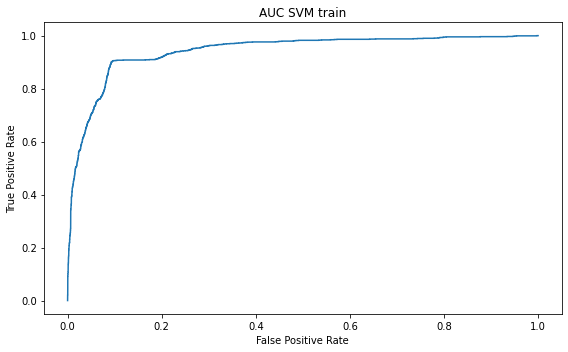

SVM AUC Score train ->  0.9415174535742395
SVM Accuracy Score train ->  0.9126804246689729


In [101]:
auc_svm_train = metrics.roc_auc_score(train_labels, svm_pred_train)

fpr_svm_train, tpr_svm_train, thresholds_svm_train = metrics.roc_curve(train_labels,svm_pred_train)

plt.plot(fpr_svm_train,tpr_svm_train)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title ('AUC SVM train')
plt.show()

print("SVM AUC Score train -> ",auc_svm_train)
print("SVM Accuracy Score train -> ",accuracy_score(predictions_SVM_train, train_labels))

## Scores for RFC

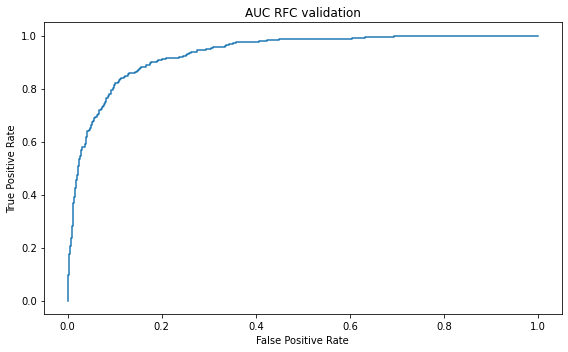

RFC AUC Score validation ->  0.9326660503484567
RFC Accuracy Score validation ->  0.9098282442748091


In [102]:
auc_RFC_validation = metrics.roc_auc_score(validation_labels, RFC_pred_validation)

fpr_RFC_valiation, tpr_RFC_validation, thresholds_RFC_validation = metrics.roc_curve(validation_labels,RFC_pred_validation)

plt.plot(fpr_RFC_valiation,tpr_RFC_validation)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title ('AUC RFC validation')
plt.show()

print("RFC AUC Score validation -> ",auc_RFC_validation)
print("RFC Accuracy Score validation -> ",accuracy_score(predictions_RFC_validation, validation_labels))



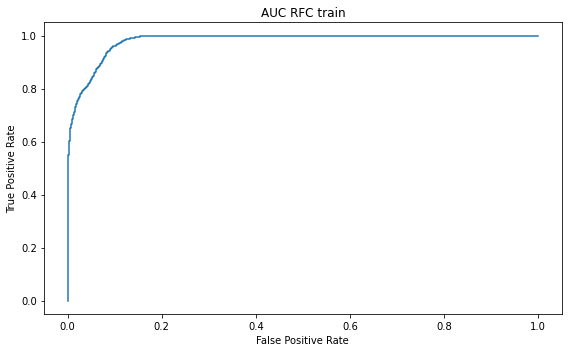

RFC AUC Score train ->  0.9814985509035066
RFC Accuracy Score train ->  0.9426219730406775


In [103]:
auc_RFC_train = metrics.roc_auc_score(train_labels, RFC_pred_train)

fpr_RFC_train, tpr_RFC_train, thresholds_RFC_train = metrics.roc_curve(train_labels,RFC_pred_train)

plt.plot(fpr_RFC_train,tpr_RFC_train)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title ('AUC RFC train')
plt.show()

print("RFC AUC Score train -> ",auc_RFC_train)
print("RFC Accuracy Score train -> ",accuracy_score(predictions_RFC_train,train_labels))

## 5 - Predictions export

## RFC model had the best results. We would use it to make the final predictions.

In [104]:
predictions_RFC_test = best_est.predict_proba(data_test_copy)
predictions_RFC_test = pd.DataFrame(predictions_RFC_test)
predictions_RFC_test = pd.DataFrame(predictions_RFC_test[1])

In [105]:
predictions_RFC_test.to_csv('Submission_group_29.csv')